# Transform

In [0]:
from pyspark.sql import SparkSession

# Define the Delta table path (same as used in the extract notebook)
delta_table_path = "/delta/flights_data"

# Read the Delta table
df = spark.read.format("delta").load(delta_table_path)

In [0]:
from pyspark.sql import functions as F

In [0]:
less_than_500_miles = df.filter(df["distance"] < 500)
avg_delay_less_than_500 = less_than_500_miles.groupBy("origin").agg(F.round(F.avg("delay"), 2).alias("average_delay"))
avg_delay_less_than_500.show()

+------+-------------+
|origin|average_delay|
+------+-------------+
|   MSY|        13.18|
|   SNA|        11.51|
|   PSG|        -0.25|
|   MYR|         7.65|
|   PVD|        10.41|
|   OAK|        13.88|
|   MQT|        23.87|
|   MSN|         8.66|
|   BTM|        -0.77|
|   SCC|          1.6|
|   MLU|         7.91|
|   WRG|         -2.5|
|   RDM|         4.27|
|   ORF|        10.36|
|   SCE|        17.92|
|   SAV|        10.41|
|   TRI|         6.67|
|   MOD|         9.93|
|   TYR|         3.57|
|   MOB|        11.26|
+------+-------------+
only showing top 20 rows



# Data Validation Checks

In [0]:
# Check for null values in 'origin' column
assert avg_delay_less_than_500.filter(avg_delay_less_than_500['origin'].isNull()).count() == 0, "Null values found in 'origin' column"

# Check for null values in 'average_delay' column
assert avg_delay_less_than_500.filter(avg_delay_less_than_500['average_delay'].isNull()).count() == 0, "Null values found in 'average_delay' column"

In [0]:
# Check that the DataFrame is not empty
assert avg_delay_less_than_500.count() > 0, "The DataFrame is empty"

# Optionally, check for a minimum expected number of rows
min_expected_rows = 10  # replace with your expected minimum
assert avg_delay_less_than_500.count() >= min_expected_rows, f"The DataFrame contains fewer than {min_expected_rows} rows"

In [0]:
# Check for duplicate 'origin' values
assert avg_delay_less_than_500.count() == avg_delay_less_than_500.select('origin').distinct().count(), "Duplicate 'origin' values found"

# Data Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
avg_delay_less_than_500.show()

+------+-------------+
|origin|average_delay|
+------+-------------+
|   MSY|        13.18|
|   SNA|        11.51|
|   PSG|        -0.25|
|   MYR|         7.65|
|   PVD|        10.41|
|   OAK|        13.88|
|   MQT|        23.87|
|   MSN|         8.66|
|   BTM|        -0.77|
|   SCC|          1.6|
|   MLU|         7.91|
|   WRG|         -2.5|
|   RDM|         4.27|
|   ORF|        10.36|
|   SCE|        17.92|
|   SAV|        10.41|
|   TRI|         6.67|
|   MOD|         9.93|
|   TYR|         3.57|
|   MOB|        11.26|
+------+-------------+
only showing top 20 rows



In [0]:
# Sort the DataFrame
sorted_df = avg_delay_less_than_500.orderBy("average_delay", ascending=False) 

# Take the first 20 rows
top_20_rows = sorted_df.limit(20)

# Show the result
top_20_rows.show()

+------+-------------+
|origin|average_delay|
+------+-------------+
|   EGE|         71.0|
|   LSE|        26.53|
|   MQT|        23.87|
|   IAD|        21.09|
|   ROA|        19.89|
|   SYR|        19.05|
|   ORD|        18.72|
|   FLL|        18.15|
|   MDW|        18.07|
|   SCE|        17.92|
|   DSM|         17.9|
|   DEN|        17.78|
|   FAR|        17.57|
|   ALO|        17.16|
|   LNK|        17.02|
|   BWI|        16.73|
|   BGR|        16.51|
|   MLI|        16.27|
|   PIA|        16.25|
|   LAN|        16.15|
+------+-------------+



In [0]:
data_to_visualize = top_20_rows.toPandas()

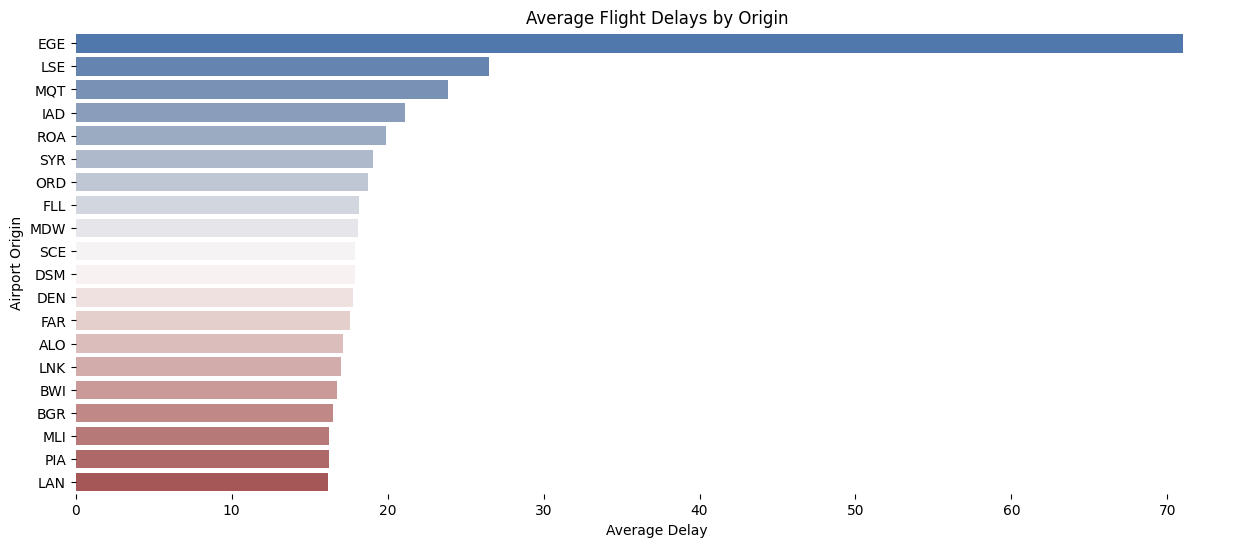

In [0]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="average_delay", y="origin", data = data_to_visualize, palette="vlag")
ax.set_xlabel('Average Delay')
ax.set_ylabel('Airport Origin')
ax.set_title('Average Flight Delays by Origin')
sns.despine(left=True, bottom=True)

plt.show()

<b>In this analysis, we have identified the top 20 flight routes under 500 miles experiencing the highest average delays. To enhance operational efficiency and customer satisfaction, it is crucial to implement strategic measures aimed at minimizing these delays.

In [0]:
final_spark_df = spark.createDataFrame(data_to_visualize)

In [0]:
final_spark_df.show()

+------+-------------+
|origin|average_delay|
+------+-------------+
|   EGE|         71.0|
|   LSE|        26.53|
|   MQT|        23.87|
|   IAD|        21.09|
|   ROA|        19.89|
|   SYR|        19.05|
|   ORD|        18.72|
|   FLL|        18.15|
|   MDW|        18.07|
|   SCE|        17.92|
|   DSM|         17.9|
|   DEN|        17.78|
|   FAR|        17.57|
|   ALO|        17.16|
|   LNK|        17.02|
|   BWI|        16.73|
|   BGR|        16.51|
|   MLI|        16.27|
|   PIA|        16.25|
|   LAN|        16.15|
+------+-------------+

